# 킹

## 문제

* 8*8크기의 체스판에 왕이 하나 있다. 킹의 현재 위치가 주어진다. 체스판에서 말의 위치는 다음과 같이 주어진다. 알파벳 하나와 숫자 하나로 이루어져 있는데, 알파벳은 열을 상징하고, 숫자는 행을 상징한다. 열은 가장 왼쪽 열이 A이고, 가장 오른쪽 열이 H까지 이고, 행은 가장 아래가 1이고 가장 위가 8이다. 예를 들어, 왼쪽 아래 코너는 A1이고, 그 오른쪽 칸은 B1이다.

* 킹은 다음과 같이 움직일 수 있다.
  * R : 한 칸 오른쪽으로
  * L : 한 칸 왼쪽으로
  * B : 한 칸 아래로
  * T : 한 칸 위로
  * RT : 오른쪽 위 대각선으로
  * LT : 왼쪽 위 대각선으로
  * RB : 오른쪽 아래 대각선으로
  * LB : 왼쪽 아래 대각선으로

* 스판에는 돌이 하나 있는데, 돌과 같은 곳으로 이동할 때는, 돌을 킹이 움직인 방향과 같은 방향으로 한 칸 이동시킨다. 아래 그림을 참고하자.

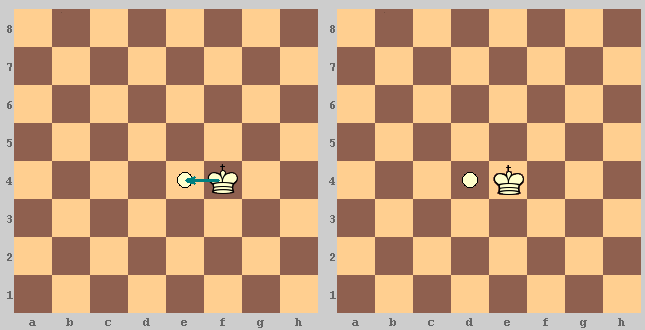

In [1]:
from IPython.display import Image
Image('../image/1063_킹.png')

* 입력으로 킹이 어떻게 움직여야 하는지 주어진다. 입력으로 주어진 대로 움직여서 킹이나 돌이 체스판 밖으로 나갈 경우에는 그 이동은 건너 뛰고 다음 이동을 한다.
* 킹과 돌의 마지막 위치를 구하는 프로그램을 작성하시오.

## 입력

* 첫째 줄에 킹의 위치, 돌의 위치, 움직이는 횟수 N이 주어진다. 둘째 줄부터 N개의 줄에는 킹이 어떻게 움직여야 하는지 주어진다. N은 50보다 작거나 같은 자연수이고, 움직이는 정보는 위에 쓰여 있는 8가지 중 하나이다.

## 출력

* 첫째 줄에 킹의 마지막 위치, 둘째 줄에 돌의 마지막 위치를 출력한다.

## Code

In [2]:
def find_xy(position):
    x = ord(position[0]) - ord('A')
    y = int(position[1]) -1
    return x, y

def to_position(x, y):
    pos = ''
    pos += str(chr(x+65))
    pos += str(y+1)
    return pos

def predict_next(command, x, y):
    for c_dir in list(command):
        if (c_dir == 'R'):
            x += 1
        elif (c_dir == 'L'):
            x -= 1
        elif (c_dir == 'B'):
            y -= 1
        elif (c_dir == 'T'):
            y += 1
    return x, y

def solution():
    chess_k, chess_p, N = input().split()
    k_x, k_y = find_xy(chess_k)
    p_x, p_y = find_xy(chess_p)

    for _ in range(int(N)):
        command = input()
        next_k_x, next_k_y = predict_next(command, k_x, k_y)
        if not ((next_k_x == p_x) and (next_k_y == p_y)):
            if (0 <= next_k_x <= 7) and (0 <= next_k_y <= 7):
                k_x, k_y = next_k_x, next_k_y
        elif ((next_k_x == p_x) and (next_k_y == p_y)):
            next_p_x, next_p_y = predict_next(command, p_x, p_y)
            if (0 <= next_p_x <=7) and (0 <= next_p_y <=7):
                k_x, k_y = next_k_x, next_k_y
                p_x, p_y = next_p_x, next_p_y
        print(command)
    print('\n')
    print(to_position(k_x, k_y))
    print(to_position(p_x, p_y))

## 예제입력 - 출력

In [3]:
solution()

B
L
LB
RB
LT


A1
A2


In [4]:
solution()

T


A2
H8


In [5]:
solution()

T


A2
A3


In [6]:
solution()

T
R


B2
A3


In [7]:
solution()

RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB
RB


G2
H1


In [8]:
solution()

L
T
LB


B2
A1


## Note

* A1, A2.. 등의 체스판 위의 좌표를 (0, 0), (0, 1)..으로 바꾸는 find_xy를 함수를 만든다
* x, y 좌표를 다시 체스판 위의 좌표로 만드는 to_position 함수를 만든다.
* 입력된 명령어의 위치를 반환하는 predict_next 함수를 만든다. 입력이 2개인 경우, List로 만들고 For문을 이용하여 코드를 간결하게 한다.
* 현재 킹의 위치를 x, y로 변환하고, predict_next 함수로 다음 위치를 계산한 뒤 해당 위치가 A~H, 1~8의 범위 안에 위치하는지 확인한다. 해당 범위 안이면 이동하고, 범위 밖이면 이동하지 않는다.
* 만약 다음 위치가 돌의 위치와 동일하면, 돌을 똑같은 명령을 사용하여 이동한다. 다만, 돌의 다음 위치가 범위 밖이면 퀸도, 돌도 이동하지 않는다.

https://www.acmicpc.net/problem/1063